In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
#imports

In [82]:
names = ["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classe"]
data = "page-blocks.data"
df = pd.read_fwf(data, names = names)
df
#1=text 2=Horizontal line 3=Picture 4=Vertical line 5=Graphic

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,136,264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1


In [113]:
#catégories de blocs
text = df[df.classe == 1]
hor = df[df.classe == 2]
pic = df[df.classe == 3]
ver = df[df.classe == 4]
graph = df[df.classe == 5]
print("Il y a {ntext} Textes, {nhor} blocs horizontaux, {npic} images, {nver} blocs verticaux, {ngraph} graphiques".format(ntext=len(text),nhor = len(hor),npic = len(pic),nver = len(ver),ngraph = len(graph)))


Il y a 4913 Textes, 329 blocs horizontaux, 28 images, 88 blocs verticaux, 115 graphiques


In [103]:
# Ajout d'une colonne, on rajoute ici les catégories de blocs
values = []
for x in df.classe:
    if x == 1:
        values.append("Text")
    elif x == 2:
        values.append("Horizontal_Line")
    elif x == 3:
        values.append("Picture")
    elif x == 4:
        values.append("Vertical_Line")
    elif x == 5:
        values.append("Graphic")
df["Catégorie_bloc"] = values
df


,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe,Catégorie_bloc
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1,Text
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1,Text
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1,Text
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1,Text
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1,Text
...,...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,136,264,28,2,Horizontal_Line
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1,Text
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1,Text
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1,Text


In [104]:
df.shape

(5473, 12)

In [86]:
df.groupby(["height", "lenght"])["classe"].count()

height  lenght
0       49        1
1       7         5
        8         6
        9         5
        10        6
                 ..
93      104       1
94      2         1
95      93        1
97      198       1
98      3         1
Name: classe, Length: 2011, dtype: int64

In [118]:
filtre = df.height >= 7
df[filtre].head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe,Catégorie_bloc
25,13,25,325,1.923,0.234,0.286,10.86,76,93,7,1,Text
26,13,25,325,1.923,0.351,0.680,6.00,114,221,19,1,Text
27,7,16,112,2.286,0.321,0.643,2.57,36,72,14,1,Text
28,7,103,721,14.714,0.295,0.691,1.76,213,498,121,1,Text
29,11,9,99,0.818,0.343,0.626,3.40,34,62,10,1,Text


In [119]:
filtre = df.wb_trans!=1
df[filtre].head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe,Catégorie_bloc
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1,Text
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1,Text
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1,Text
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1,Text
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1,Text


In [107]:
#moyenne des longueurs par classe
df.groupby(["Catégorie_bloc"])["lenght"].mean()

Catégorie_bloc
Graphic             89.965217
Horizontal_Line    141.875380
Picture            153.071429
Text                87.255038
Vertical_Line        2.431818
Name: lenght, dtype: float64

In [108]:
#moyenne des hauteurs par classe
df.groupby(["Catégorie_bloc"])["height"].mean()

Catégorie_bloc
Graphic            28.008696
Horizontal_Line     2.544073
Picture            57.678571
Text                9.132302
Vertical_Line      23.636364
Name: height, dtype: float64

In [116]:
#moyenne des aires par classe
df.groupby(["Catégorie_bloc"])["area"].mean()

Catégorie_bloc
Graphic            2035.521739
Horizontal_Line     478.908815
Picture            3948.035714
Text                906.524730
Vertical_Line       260.534091
Name: area, dtype: float64

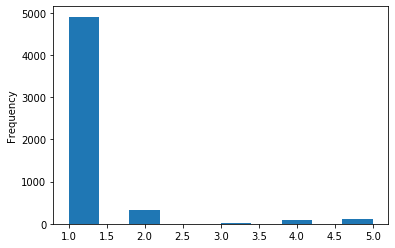

In [168]:
df.classe.plot.hist()
#il y a beaucoup de 1 (textes) par rapport au autres types

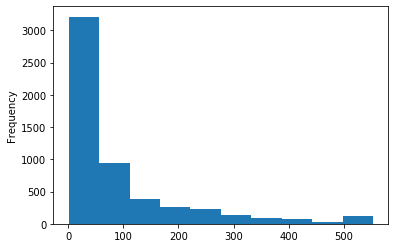

In [39]:
df.lenght.plot.hist()

In [128]:
#On affiche les moyennes et ecarts des hauteurs, largeurs et aires pour chaque catégorie de blocs
tab = df.pivot_table(df[["height","lenght","area"]],
                             index=["Catégorie_bloc"],                           
                           aggfunc=[np.mean, np.std])
tab

mean                                 std             \
                        area     height      lenght         area     height   
Catégorie_bloc                                                                
Graphic          2035.521739  28.008696   89.965217  2572.789725  24.617244   
Horizontal_Line   478.908815   2.544073  141.875380  1185.211334   4.182429   
Picture          3948.035714  57.678571  153.071429  2712.209015  24.023220   
Text              906.524730   9.132302   87.255038  1365.080403   4.913088   
Vertical_Line     260.534091  23.636364    2.431818  1263.156455  22.731406   

                             
                     lenght  
Catégorie_bloc               
Graphic          128.954155  
Horizontal_Line  172.613924  
Picture          155.615368  
Text             108.650237  
Vertical_Line      4.610820

In [129]:
tab2 = df.pivot_table(df[["blackpix","blackand"]],
                             index=["Catégorie_bloc"],                           
                           aggfunc=[np.mean, np.std])
tab2

mean                     std            
                   blackand    blackpix    blackand    blackpix
Catégorie_bloc                                                 
Graphic          305.104348  224.539130  299.926581  266.216746
Horizontal_Line  172.428571  149.106383  226.939047  201.935885
Picture          542.892857  483.285714  254.929669  271.693026
Text             307.909220  194.783025  262.004704  213.509806
Vertical_Line     48.977273   49.545455   95.369695  102.536555

In [131]:
tab3 = df.pivot_table(index=["Catégorie_bloc"], 
                           values=["area"], 
                           aggfunc="mean", 
                           fill_value=0)
tab3

,area
Catégorie_bloc,
Graphic,2035.521739
Horizontal_Line,478.908815
Picture,3948.035714
Text,906.524730
Vertical_Line,260.534091


In [132]:
tab3.sort_values("area")

,area
Catégorie_bloc,
Vertical_Line,260.534091
Horizontal_Line,478.908815
Text,906.524730
Graphic,2035.521739
Picture,3948.035714


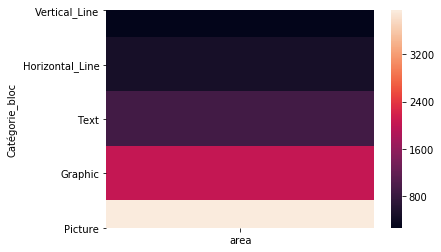

In [133]:
#Heatmap des aires des blocks pour chaque catégorie de  blocs
sns.heatmap(tab3.sort_values("area"))

In [134]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

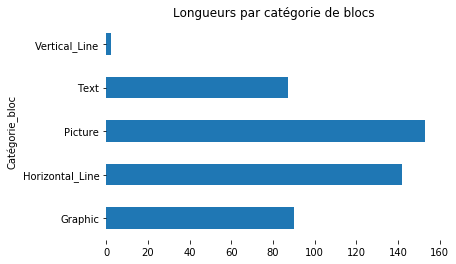

In [140]:
title = "Longueurs par catégorie de blocs"
to_plot = df.groupby("Catégorie_bloc")["lenght"].mean()
ax = to_plot.plot.barh(title=title)
despine_ax(ax)
ax

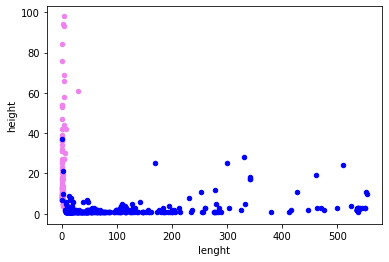

In [142]:
mask_ver = df["classe"]==4
mask_hor = df["classe"]==2
ax = df[mask_ver].plot.scatter(x="lenght", y="height", color="violet")
df[mask_hor].plot.scatter(x="lenght", y="height", color="blue", ax=ax)
#Clustering

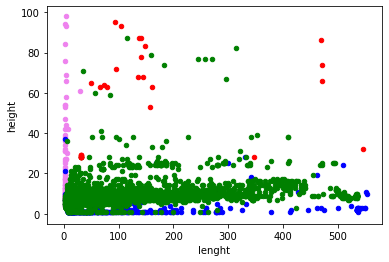

In [143]:
mask_ver = df["classe"]==4
mask_hor = df["classe"]==2
mask_txt = df["classe"]==1
mask_pic = df["classe"]==3
ax = df[mask_ver].plot.scatter(x="lenght", y="height", color="violet")
ax2 =df[mask_hor].plot.scatter(x="lenght", y="height", color="blue", ax=ax)
ax3 =df[mask_txt].plot.scatter(x="lenght", y="height", color="green", ax=ax2)
df[mask_pic].plot.scatter(x="lenght", y="height", color="red", ax=ax3)
#Clustering



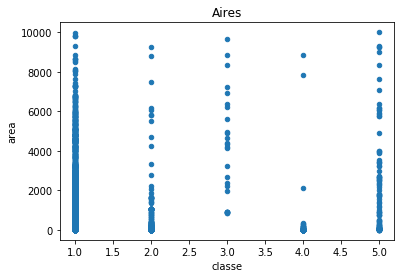

In [167]:
df.plot.scatter(x="classe", y="area",title = "Aires")

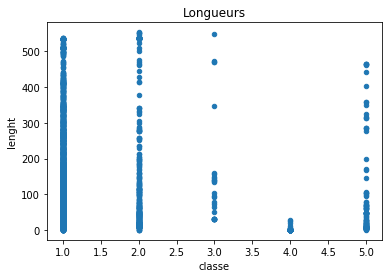

In [165]:
df.plot.scatter(x="classe", y="lenght",title = "Longueurs")

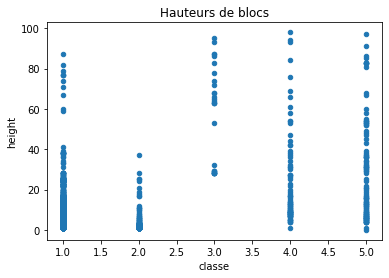

In [164]:
df.plot.scatter(x="classe", y="height",title = "Hauteurs de blocs")
#max corrélation max entre height et classe

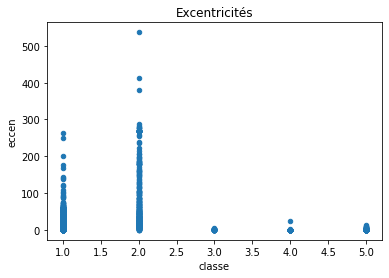

In [163]:
df.plot.scatter(x="classe", y="eccen",title = "Excentricités")

In [155]:
#Matrice des correlations
df.corr()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classe
height,1.000000,0.160192,0.476609,-0.167535,-0.022791,-0.244374,0.117986,0.294114,0.214220,0.324479,0.374747
lenght,0.160192,1.000000,0.802339,0.561366,-0.205180,-0.376210,0.145906,0.736549,0.485997,0.817419,-0.004540
area,0.476609,0.802339,1.000000,0.173585,-0.180489,-0.366963,0.063309,0.688167,0.445738,0.847625,0.066351
eccen,-0.167535,0.561366,0.173585,1.000000,0.128455,-0.066366,0.394861,0.279226,0.170932,0.153956,0.099196
p_black,-0.022791,-0.205180,-0.180489,0.128455,1.000000,0.514982,0.304341,-0.135326,-0.244868,-0.265850,0.212936
p_and,-0.244374,-0.376210,-0.366963,-0.066366,0.514982,1.000000,-0.023875,-0.270587,-0.212946,-0.275328,-0.177085
mean_tr,0.117986,0.145906,0.063309,0.394861,0.304341,-0.023875,1.000000,0.076889,0.011619,-0.078513,0.195277
blackpix,0.294114,0.736549,0.688167,0.279226,-0.135326,-0.270587,0.076889,1.000000,0.562308,0.752659,-0.023812
blackand,0.214220,0.485997,0.445738,0.170932,-0.244868,-0.212946,0.011619,0.562308,1.000000,0.488063,-0.085276
wb_trans,0.324479,0.817419,0.847625,0.153956,-0.265850,-0.275328,-0.078513,0.752659,0.488063,1.000000,-0.064489


In [172]:
df.corr().classe
#Corrélations de tous les paramètres avec le paramètre classe

height      0.374747
lenght     -0.004540
area        0.066351
eccen       0.099196
p_black     0.212936
p_and      -0.177085
mean_tr     0.195277
blackpix   -0.023812
blackand   -0.085276
wb_trans   -0.064489
classe      1.000000
Name: classe, dtype: float64

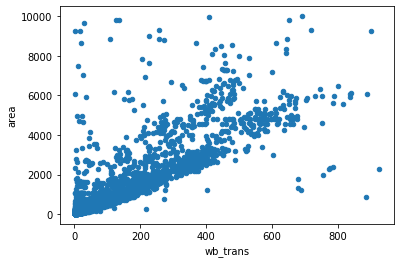

In [159]:
df.plot.scatter(x="wb_trans", y="area",title = "Transitions noir/blanc en fonction de l'aire")
#On voit ici la corrélation importante entre les deux paramètres

1.0